In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('../titanic_data/train.csv')

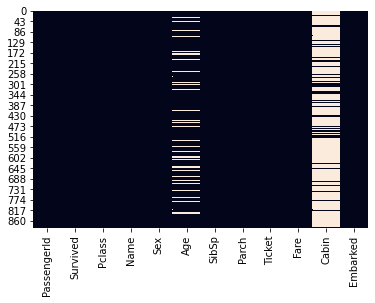

In [3]:
sns.heatmap(data.isnull(), cbar=False)

In [175]:
X = data.drop(['Name', 'Ticket', 'Cabin', 'Survived', 'PassengerId'], axis=1)
y = data.Survived

In [176]:
X = pd.get_dummies(X)

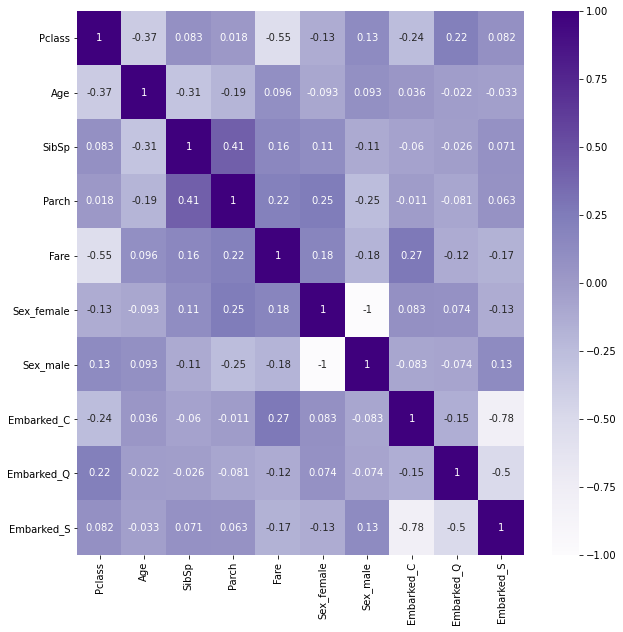

In [177]:
plt.figure(figsize=(10,10))
sns.heatmap(X.corr(), cmap='Purples', annot=True)

In [178]:
X['Age'] = X.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))

In [179]:
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [180]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

## Дерево решений

In [187]:
from sklearn import tree

In [190]:
tree_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
tree_clf.fit(X_train, y_train)
tree_predicted = tree_clf.predict(X_test)

In [192]:
accuracy_score(y_test, tree_predicted)

0.7788461538461539

## Случайный лес

In [193]:
from sklearn import ensemble

In [194]:
forest_clf = ensemble.RandomForestClassifier(criterion='entropy', max_depth=5, random_state = 0)
forest_clf.fit(X_train, y_train)
forest_predicted = forest_clf.predict(X_test)

In [195]:
accuracy_score(y_test, forest_predicted)

0.8092948717948718

## Сеточный поиск с деревом

In [217]:
from sklearn import model_selection

parameter_grid = {
    'max_depth': range(1, 10),
    'criterion':['entropy', 'gini'],
    
 }
grid_clf = model_selection.GridSearchCV(tree.DecisionTreeClassifier(random_state=0),parameter_grid,cv=5 )

In [218]:
grid_clf.fit(X_train, y_train)
grid_predicted = grid_clf.predict(X_test)
accuracy_score(y_test, grid_predicted)

0.780448717948718

In [221]:
grid_clf.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)

In [222]:
grid_clf.best_params_

{'criterion': 'entropy', 'max_depth': 2}